In [1]:
%matplotlib inline

In [5]:
from numpy import *
import matplotlib.pyplot as plt

In [51]:
%ls *npy

CLC.npy            HHL.npy                LWC.npy                 RH.npy
CLC_TOT.npy        IWC.npy                pres.npy                RI.npy
dtau_i.VIS006.npy  lat_seviri.VIS006.npy  refl_seviri.VIS006.npy  RW.npy
dtau_w.VIS006.npy  lon_seviri.VIS006.npy  refl_visop.VIS006.npy


In [52]:
refl_seviri=transpose(load('refl_seviri.VIS006.npy'))
refl_visop=transpose(load('refl_visop.VIS006.npy'))
refl_seviri.shape, refl_visop.shape

((224, 416), (224, 416))

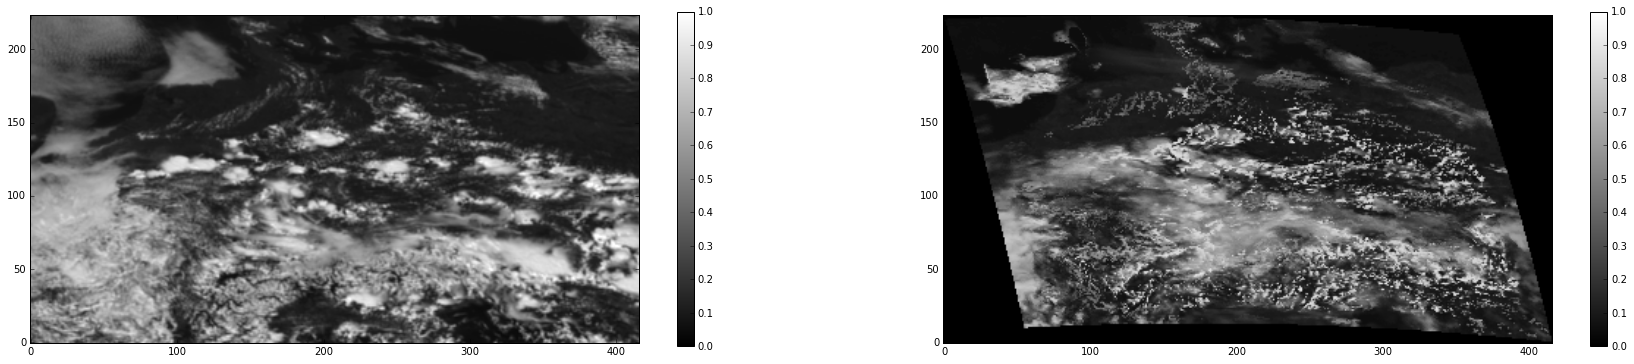

In [53]:
fig = plt.figure(figsize=(30,20))
plt.gray()

ax1 = fig.add_subplot(1, 2, 1)
im1=ax1.imshow(refl_seviri, vmin=0.0, vmax=1.0, origin='lower')
plt.colorbar(im1,shrink=0.3)

ax2 = fig.add_subplot(1, 2, 2)
im2=ax2.imshow( refl_visop, vmin=0.0, vmax=1.0, origin='lower')
plt.colorbar(im2,shrink=0.3)

In [54]:
dtau=load("dtau_w.VIS006.npy")
reff=load("RW.npy")
hhl=load("HHL.npy")
dtau_i=load("dtau_i.VIS006.npy")
reff_i=load("RI.npy")


In [8]:
dtau.shape, hhl.shape, reff.shape

((461, 421, 50), (461, 421, 51), (461, 421, 50))

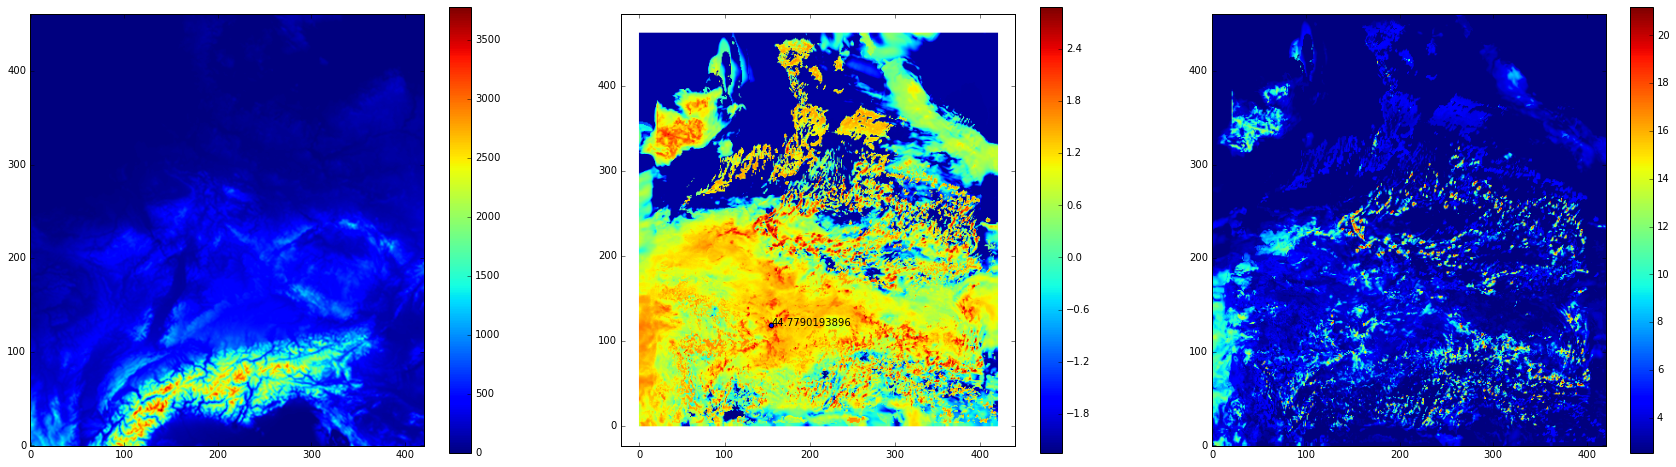

In [38]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(30,20))
plt.jet()

ax1 = fig.add_subplot(1, 3, 1)
im1=ax1.imshow(hhl.min(axis=2),origin='lower')
plt.colorbar(im1,shrink=0.4)

ax2 = fig.add_subplot(1, 3, 2)
im2=ax2.imshow( log10(dtau.sum(axis=2)+1e-3),origin='lower')
i0=155
j0=118
ax2.scatter( i0, j0 )
ax2.text( i0, j0, str(dtau.sum(axis=2)[j0,i0]) )
plt.colorbar(im2,shrink=0.4)

ax3 = fig.add_subplot(1, 3, 3)
im3=ax3.imshow( reff.max(axis=2),origin='lower')
plt.colorbar(im3,shrink=0.4)

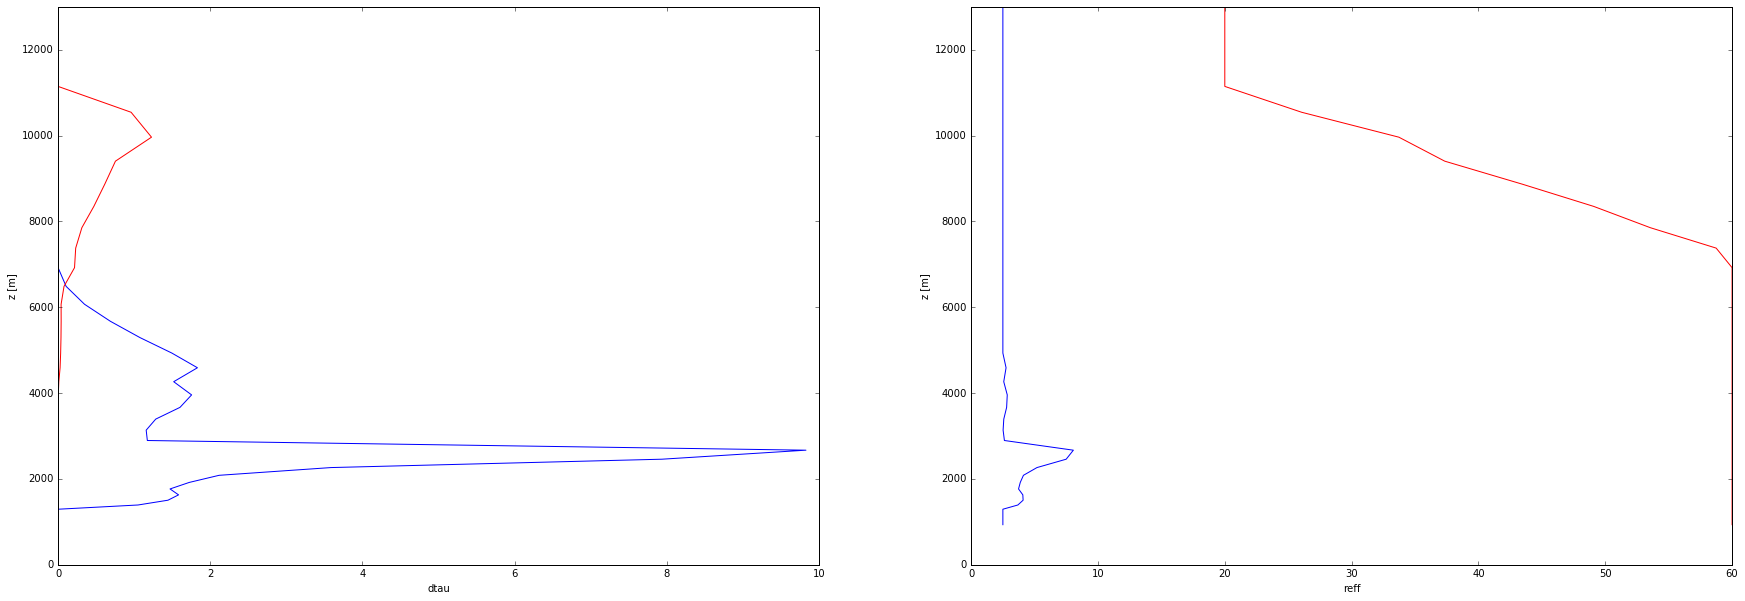

In [56]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot( dtau[j0,i0,:], hhl[j0,i0,1:] )
ax1.plot( dtau_i[j0,i0,:], hhl[j0,i0,1:], color='r' )
ax1.set_ylim(0,1.3e4)
ax1.set_ylabel('z [m]')
ax1.set_xlabel('dtau')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot( reff[j0,i0,:], hhl[j0,i0,1:] )
ax2.plot( reff_i[j0,i0,:], hhl[j0,i0,1:], color='r' )
ax2.set_ylim(0,1.3e4)
ax2.set_ylabel('z [m]')
ax2.set_xlabel('reff')



In [57]:
hhl[j0,i0,1:]

array([ 21000.        ,  20028.5703125 ,  19085.359375  ,  18170.        ,
        17282.140625  ,  16421.4296875 ,  15587.5       ,  14780.        ,
        13998.5703125 ,  13242.859375  ,  12512.5       ,  11807.13671875,
        11145.40039062,  10542.984375  ,   9962.53125   ,   9403.71484375,
         8866.19140625,   8349.63671875,   7853.765625  ,   7378.18359375,
         6922.60546875,   6486.69140625,   6070.1015625 ,   5672.55859375,
         5293.6875    ,   4933.13671875,   4590.62597656,   4265.83789062,
         3958.36376953,   3667.96899414,   3394.30273438,   3137.05737305,
         2895.82055664,   2670.3046875 ,   2460.2019043 ,   2265.22436523,
         2084.94970703,   1919.09008789,   1767.33789062,   1629.34277344,
         1504.81738281,   1393.39160156,   1294.71459961,   1208.55175781,
         1134.42810059,   1072.16038513,   1021.3986969 ,    981.73036194,
          952.91021824,    934.52557755])